In [2]:
# Chargement du script raster_tools (un module - et pour l'instant l'unique - du package telenvi)
import os
import raster_tools as rt

---------
telenvi package 3.0.7
---------


In [3]:
# Définition des chemins vers les cibles d'intérêt pour nos tests
path_im_sentinel = "/hello/CAM-RANH_2022_06_21_S2A/T49PBP_20220621T030551_B04.jp2"
path_im_landsat = "/hello/CAM-RANH_2011_10_30_LS8/LT05_L2SP_123052_20111030_20200820_02_T1_SR_B4.TIF"

In [4]:
"""
La fonction principale associée à la classe GeoIm est openGeoRaster. Elle permet de créer
un GeoIm directement à partir d'un fichier raster. 

Une partie des traitements applicables aux GeoIms le sont directement lors de l'ouverture
des rasters, grâce à des paramètres facultatifs de cette fonction openGeoRaster. 

Voyons comment s'en servir et ce que l'on peut en tirer.
"""

"\nLa fonction principale associée à la classe GeoIm est openGeoRaster. Elle permet de créer\nun GeoIm directement à partir d'un fichier raster. \n\nUne partie des traitements applicables aux GeoIms le sont directement lors de l'ouverture\ndes rasters, grâce à des paramètres facultatifs de cette fonction openGeoRaster. \n\nVoyons comment s'en servir et ce que l'on peut en tirer.\n"

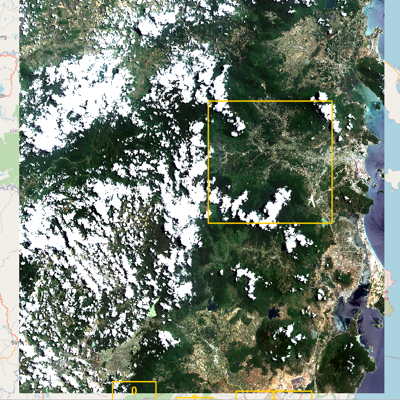

In [5]:
"""
1 - Ouverture et crop
Le crop d'un raster dès son ouverture a un intérêt principal : réduire drastiquement le temps d'ouverture.

La figure ci-dessous permet de visualiser l'emprise sur laquelle on va venir découper l'image (en jaune)
"""
from PIL import Image
Image.open("/hello/CAM-RANH_2022_06_21_S2A/zone_crop_sentinel.png").resize((400, 400))

In [6]:
# Ouverture sans crop - 6 secondes d'ouverture
full_im_sentinel = rt.openGeoRaster(path_im_sentinel)

geoim from file T49PBP_20220621T030551_B04.jp2 ready


In [7]:
# Ouverture avec crop - Moins de 2 secondes d'ouvertures
crop_im_sentinel = rt.openGeoRaster(
    rasterPath = path_im_sentinel,
    crop = "/hello/CAM-RANH_2011_10_30_LS8/zones_interet.shp",
    pol =3)

crop
geoim from file T49PBP_20220621T030551_B04.jp2 ready


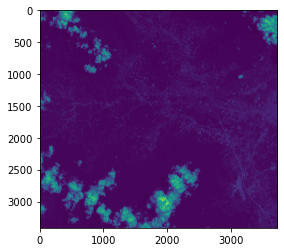

In [8]:
crop_im_sentinel.quickVisual()

crop
change the pixels spatial size
geoim from file T49PBP_20220621T030551_B04.jp2 ready


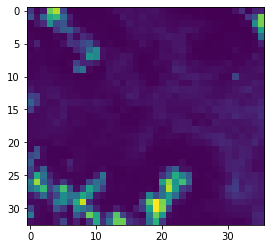

In [9]:
"""
2 - Ouverture et rééchantillonage
Il est possible d'ouvrir une image en réduisant directement sa résolution.
Pareil, gros gain de temps d'exécution sur l'ouverture.
"""
res_im_sentinel = rt.openGeoRaster(
    rasterPath = path_im_sentinel,
    crop = "/hello/CAM-RANH_2011_10_30_LS8/zones_interet.shp",
    pol = 3,
    res = 1000,
    resMethod = "average"
)

res_im_sentinel.quickVisual()

In [10]:
"""
3 - Ouverture et reprojection
Il est possible d'ouvrir une image en modifiant son système de projection.
"""
reproj_im_sentinel = rt.openGeoRaster(
    rasterPath = path_im_sentinel,
    epsg = 4326
)

reproj_im_sentinel

change spatial projection
geoim from file T49PBP_20220621T030551_B04.jp2 ready
pixel size : (9.11214546821619e-05, -9.11214546821619e-05)
origin     : (108.23813543783288, 12.658786472288012)
bands      : 1
rows       : 10978
columns    : 11159
SCR epsg   : 4326
SCR name   : WGS 84
